## Inicialização

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from docx import Document

from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# from xgboost import XGBClassifier, XGBRegressor
import pandas as pd
import numpy as np

from linearmodels.panel import PanelOLS
import statsmodels.formula.api as smf
import statsmodels.api as sm


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Teste com o pacote PyFixest

In [2]:
import pyfixest as pf
from pyfixest.did.estimation import did2s
from pyfixest.did.event_study import event_study

## Importa base amostral preparada

In [3]:
df = pd.read_csv('df_basepronta2.csv', sep = ';')

print(df.shape)

(1529177, 85)


# Modelos da pesquisa

## Público 

In [4]:
anos = df['NU_ANO'].unique()

df_ano = df[df['NU_ANO'] == anos[8]].copy()

## Modelos de efeitos fixos

# Um conjunto de modelos para cada ano:

### Modelo 1 - Todos (familiar + individual)

************************************
************* ANO 2015 *************
************************************

###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: 
Inference:  iid
Observations:  195417

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept     |    461.712 |        0.167 |  2757.173 |      0.000 | 461.384 | 462.040 |
| sóI           |      8.362 |        0.457 |    18.305 |      0.000 |   7.467 |   9.258 |
| sóC           |     16.670 |        0.386 |    43.144 |      0.000 |  15.912 |  17.427 |
| IeC           |     23.102 |        0.243 |    95.229 |      0.000 |  22.626 |  23.577 |
---
RMSE: 48.846 R2: 0.046 
###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: FEMININO+Branca+Parda+CentroOeste+Nordeste+Sudeste+Sul+Mae_ESup_mais+Mae_Ens_fundamental2+Mae_Ens_medio3+Mae_fund_incompl1+Pai_ESup_mais+Pai_Ens_fundamental2+

###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: 
Inference:  iid
Observations:  115977

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept     |    458.184 |        0.350 |  1310.146 |      0.000 | 457.498 | 458.869 |
| sóI           |     13.511 |        0.436 |    30.968 |      0.000 |  12.655 |  14.366 |
| sóC           |     30.612 |        1.365 |    22.423 |      0.000 |  27.936 |  33.288 |
| IeC           |     40.955 |        0.475 |    86.197 |      0.000 |  40.024 |  41.886 |
---
RMSE: 59.178 R2: 0.065 
###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: FEMININO+Branca+Parda+CentroOeste+Nordeste+Sudeste+Sul+Mae_ESup_mais+Mae_Ens_fundamental2+Mae_Ens_medio3+Mae_fund_incompl1+Pai_ESup_mais+Pai_Ens_fundamental2+Pai_Ens_medio3+Pai_fund_incompl1+tamfam5med+tamfam6gde+infra_basicacompleta+renda_15+escpubl
Inference:  CRV1
Ob

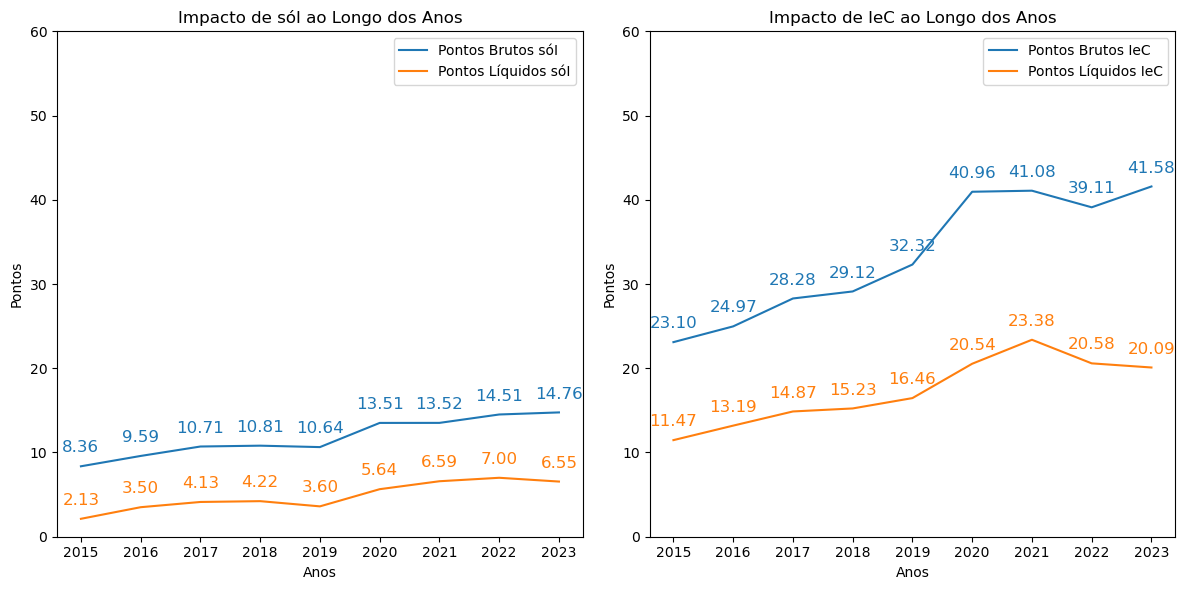

In [11]:
contexto_digital = [
'sóI','sóC','IeC'
]
vars_contexto_digital = ' + '.join(contexto_digital)

contexto_familiar = [
'Mae_ESup_mais','Mae_Ens_fundamental2','Mae_Ens_medio3','Mae_fund_incompl1','Pai_ESup_mais','Pai_Ens_fundamental2',
'Pai_Ens_medio3','Pai_fund_incompl1','tamfam5med','tamfam6gde','infra_basicacompleta','renda_15','escpubl'
]
ef_contexto_familiar = ' + '.join(contexto_familiar)


contexto_individual = [
'FEMININO','Branca','Parda',
'CentroOeste','Nordeste','Sudeste','Sul'
]
ef_contexto_individual = ' + '.join(contexto_individual)


eq1 = "NU_MEDIA ~ " + vars_contexto_digital
eq4 = "NU_MEDIA ~ " + vars_contexto_digital + " | " + ef_contexto_individual + " + " + ef_contexto_familiar
efeitoPtsBruIeC = []
efeitoPtsLiqIeC = []
efeitoPtsBruSoI = []
efeitoPtsLiqSoI = []

for ano in anos:
    print('************************************')
    print('************* ANO ' + str(ano) + ' *************')
    print('************************************\n')
    
    # Filtrar o DataFrame para o ano específico
    df_ano = df[df['NU_ANO'] == ano].copy()

    fit1 = pf.feols(eq1, df_ano)
    fit4 = pf.feols(eq4, df_ano)
    pf.summary([fit1, fit4])
    
    # Armazenar coeficientes para IeC
    efeitoPtsBruIeC.append(fit1.coef()['IeC'])
    efeitoPtsLiqIeC.append(fit4.coef()['IeC'])

    # Armazenar coeficientes para sóI
    efeitoPtsBruSoI.append(fit1.coef()['sóI'])
    efeitoPtsLiqSoI.append(fit4.coef()['sóI'])

# Criar DataFrames para os resultados
pontos_IeC = pd.DataFrame(list(zip(anos, efeitoPtsBruIeC, efeitoPtsLiqIeC)), 
                          columns=['Anos', 'Pontos Brutos IeC', 'Pontos Líquidos IeC'])
pontos_IeC.set_index('Anos', inplace=True)

pontos_SoI = pd.DataFrame(list(zip(anos, efeitoPtsBruSoI, efeitoPtsLiqSoI)), 
                          columns=['Anos', 'Pontos Brutos sóI', 'Pontos Líquidos sóI'])
pontos_SoI.set_index('Anos', inplace=True)

# Plotar os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para sóI
ax1 = pontos_SoI.plot(ax=axs[0], ylim=[0, 60], ylabel='Pontos', title='Impacto de sóI ao Longo dos Anos')
for i in pontos_SoI.index:
    ax1.annotate(f'{pontos_SoI["Pontos Brutos sóI"][i]:.2f}', 
                 xy=(i, pontos_SoI["Pontos Brutos sóI"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax1.lines[0].get_color(), ha='center', fontsize=12)
    ax1.annotate(f'{pontos_SoI["Pontos Líquidos sóI"][i]:.2f}', 
                 xy=(i, pontos_SoI["Pontos Líquidos sóI"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax1.lines[1].get_color(), ha='center', fontsize=12)

# Gráfico para IeC
ax2 = pontos_IeC.plot(ax=axs[1], ylim=[0, 60], ylabel='Pontos', title='Impacto de IeC ao Longo dos Anos')
for i in pontos_IeC.index:
    ax2.annotate(f'{pontos_IeC["Pontos Brutos IeC"][i]:.2f}', 
                 xy=(i, pontos_IeC["Pontos Brutos IeC"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax2.lines[0].get_color(), ha='center', fontsize=12)
    ax2.annotate(f'{pontos_IeC["Pontos Líquidos IeC"][i]:.2f}', 
                 xy=(i, pontos_IeC["Pontos Líquidos IeC"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax2.lines[1].get_color(), ha='center', fontsize=12)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Fazendo uma versão com FEMININO fora dos efeitos fixos

************************************
************* ANO 2015 *************
************************************

###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: 
Inference:  iid
Observations:  195417

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept     |    466.506 |        0.223 |  2089.437 |      0.000 | 466.069 | 466.944 |
| sóI           |      8.458 |        0.456 |    18.563 |      0.000 |   7.565 |   9.351 |
| sóC           |     16.599 |        0.385 |    43.076 |      0.000 |  15.844 |  17.354 |
| IeC           |     22.873 |        0.242 |    94.497 |      0.000 |  22.398 |  23.347 |
| FEMININO      |     -7.409 |        0.229 |   -32.354 |      0.000 |  -7.858 |  -6.960 |
---
RMSE: 48.716 R2: 0.051 
###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: Branca+Parda+CentroOeste+Nordeste+Sudeste+Sul+Mae_ESup_mais+Mae_Ens

###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: 
Inference:  iid
Observations:  115977

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept     |    469.385 |        0.421 |  1113.649 |      0.000 | 468.559 | 470.211 |
| sóI           |     13.513 |        0.432 |    31.262 |      0.000 |  12.665 |  14.360 |
| sóC           |     29.903 |        1.353 |    22.107 |      0.000 |  27.252 |  32.554 |
| IeC           |     39.788 |        0.471 |    84.404 |      0.000 |  38.864 |  40.712 |
| FEMININO      |    -16.826 |        0.361 |   -46.671 |      0.000 | -17.532 | -16.119 |
---
RMSE: 58.63 R2: 0.083 
###

Estimation:  OLS
Dep. var.: NU_MEDIA, Fixed effects: Branca+Parda+CentroOeste+Nordeste+Sudeste+Sul+Mae_ESup_mais+Mae_Ens_fundamental2+Mae_Ens_medio3+Mae_fund_incompl1+Pai_ESup_mais+Pai_Ens_fundamental2+Pai_Ens_medio3+Pai_fund_incompl

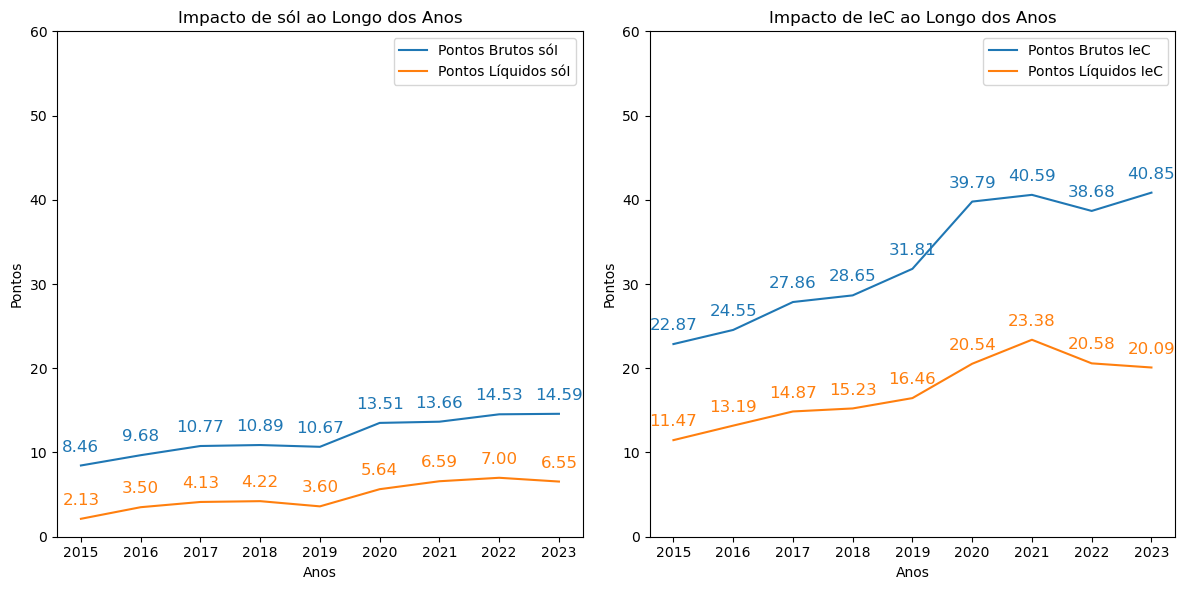

In [14]:
contexto_digital = [
'sóI','sóC','IeC', 'FEMININO'
]
vars_contexto_digital = ' + '.join(contexto_digital)

contexto_familiar = [
'Mae_ESup_mais','Mae_Ens_fundamental2','Mae_Ens_medio3','Mae_fund_incompl1','Pai_ESup_mais','Pai_Ens_fundamental2',
'Pai_Ens_medio3','Pai_fund_incompl1','tamfam5med','tamfam6gde','infra_basicacompleta','renda_15','escpubl'
]
ef_contexto_familiar = ' + '.join(contexto_familiar)


contexto_individual = [
'Branca','Parda',
'CentroOeste','Nordeste','Sudeste','Sul'
]
ef_contexto_individual = ' + '.join(contexto_individual)

eq1 = "NU_MEDIA ~ " + vars_contexto_digital
eq4 = "NU_MEDIA ~ " + vars_contexto_digital + " | " + ef_contexto_individual + " + " + ef_contexto_familiar

# Listas para armazenar os resultados
efeitoPtsBruIeC = []
efeitoPtsLiqIeC = []
efeitoPtsBruSoI = []
efeitoPtsLiqSoI = []

for ano in anos:
    print('************************************')
    print('************* ANO ' + str(ano) + ' *************')
    print('************************************\n')
    
    # Filtrar o DataFrame para o ano específico
    df_ano = df[df['NU_ANO'] == ano].copy()

    fit1 = pf.feols(eq1, df_ano)
    fit4 = pf.feols(eq4, df_ano)
    pf.summary([fit1, fit4])
    
    # Armazenar coeficientes para IeC
    efeitoPtsBruIeC.append(fit1.coef()['IeC'])
    efeitoPtsLiqIeC.append(fit4.coef()['IeC'])

    # Armazenar coeficientes para sóI
    efeitoPtsBruSoI.append(fit1.coef()['sóI'])
    efeitoPtsLiqSoI.append(fit4.coef()['sóI'])

# Criar DataFrames para os resultados
pontos_IeC = pd.DataFrame(list(zip(anos, efeitoPtsBruIeC, efeitoPtsLiqIeC)), 
                          columns=['Anos', 'Pontos Brutos IeC', 'Pontos Líquidos IeC'])
pontos_IeC.set_index('Anos', inplace=True)

pontos_SoI = pd.DataFrame(list(zip(anos, efeitoPtsBruSoI, efeitoPtsLiqSoI)), 
                          columns=['Anos', 'Pontos Brutos sóI', 'Pontos Líquidos sóI'])
pontos_SoI.set_index('Anos', inplace=True)

# Plotar os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para sóI
ax1 = pontos_SoI.plot(ax=axs[0], ylim=[0, 60], ylabel='Pontos', title='Impacto de sóI ao Longo dos Anos')
for i in pontos_SoI.index:
    ax1.annotate(f'{pontos_SoI["Pontos Brutos sóI"][i]:.2f}', 
                 xy=(i, pontos_SoI["Pontos Brutos sóI"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax1.lines[0].get_color(), ha='center', fontsize=12)
    ax1.annotate(f'{pontos_SoI["Pontos Líquidos sóI"][i]:.2f}', 
                 xy=(i, pontos_SoI["Pontos Líquidos sóI"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax1.lines[1].get_color(), ha='center', fontsize=12)

# Gráfico para IeC
ax2 = pontos_IeC.plot(ax=axs[1], ylim=[0, 60], ylabel='Pontos', title='Impacto de IeC ao Longo dos Anos')
for i in pontos_IeC.index:
    ax2.annotate(f'{pontos_IeC["Pontos Brutos IeC"][i]:.2f}', 
                 xy=(i, pontos_IeC["Pontos Brutos IeC"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax2.lines[0].get_color(), ha='center', fontsize=12)
    ax2.annotate(f'{pontos_IeC["Pontos Líquidos IeC"][i]:.2f}', 
                 xy=(i, pontos_IeC["Pontos Líquidos IeC"][i]), xytext=(0, 10), textcoords='offset points',
                 color=ax2.lines[1].get_color(), ha='center', fontsize=12)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()